# Students performance in exams
#### Marks secured by the students in college

## Aim
#### To understand the influence of various factors like economic, personal and social on the students performance 

## Inferences would be : 
#### 1. How to imporve the students performance in each test ?
#### 2. What are the major factors influencing the test scores ?
#### 3. Effectiveness of test preparation course?
#### 4. Other inferences 

#### Import the required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
print(sys.executable)

c:\Users\rutik\anaconda3\envs\ml_project_env\python.exe


#### Let us initialize the required values ( we will use them later in the program )
#### we will set the minimum marks to 40 to pass in a exam

In [5]:
passmark = 40

#### Let us read the data from the csv file

In [6]:
df = pd.read_csv("../notebook/data/StudentsPerformance.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### We will print top few rows to understand about the various data columns

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Size of data frame

In [9]:
print (df.shape)

(1000, 8)


#### Let us understand about the basic information of the data, like min, max, mean and standard deviation etc.

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Let us check for any missing values

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education ' variable:   ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education ' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O'] # o means object
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print("Numerical features: ",numerical_features,"=",len(numerical_features))
print("Categorical features: ",categorical_features,"=",len(categorical_features))


Numerical features:  ['math score', 'reading score', 'writing score'] = 3
Categorical features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] = 5


In [15]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full=df[df['reading score']==100]['lunch'].count()
writing_full=df[df['writing score']==100]['average_score'].count()
math_full=df[df['math score']==100]['average_score'].count()
print("Number of students who scored full marks in reading: ",reading_full)
print("Number of students who scored full marks in writing: ",writing_full) 
print("Number of students who scored full marks in math: ",math_full)

Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14
Number of students who scored full marks in math:  7


Visualization



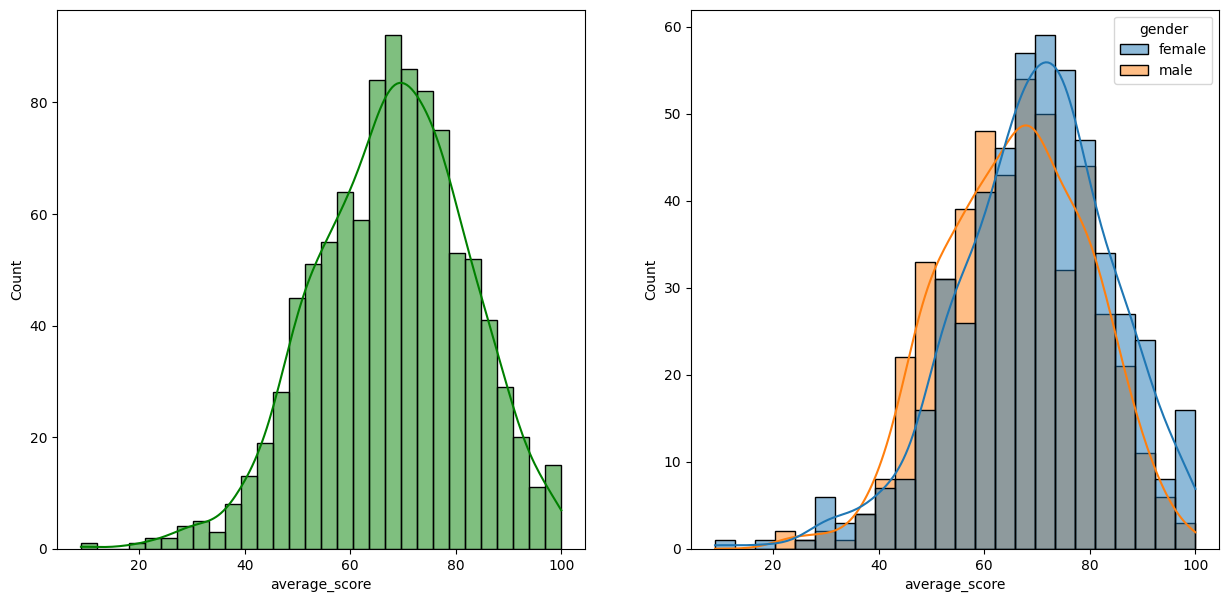

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

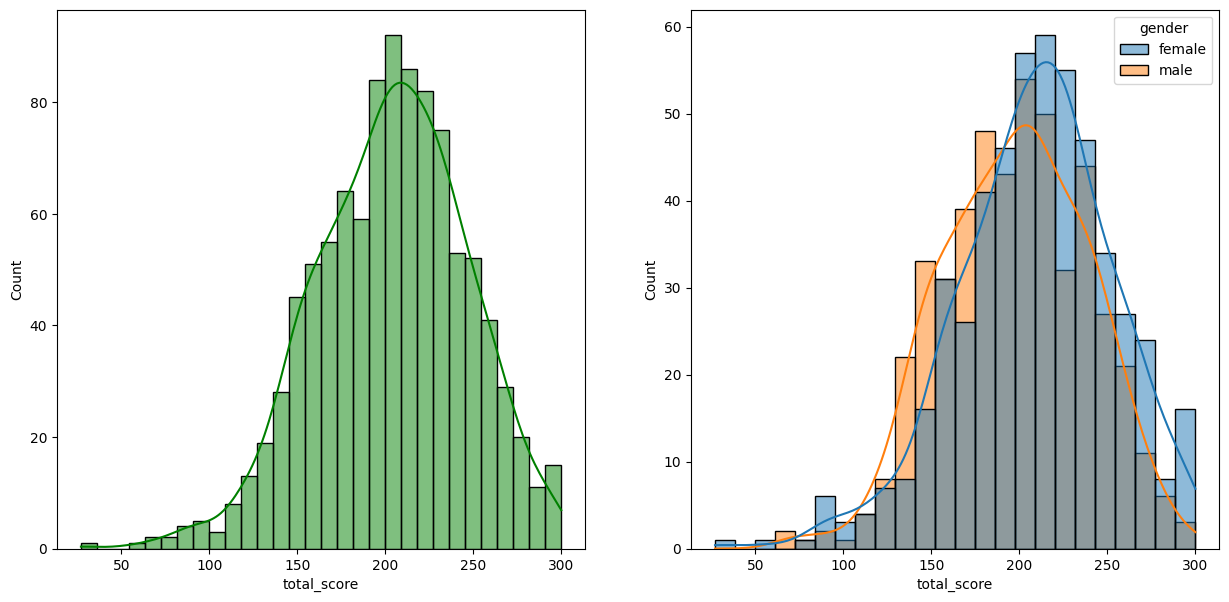

In [42]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

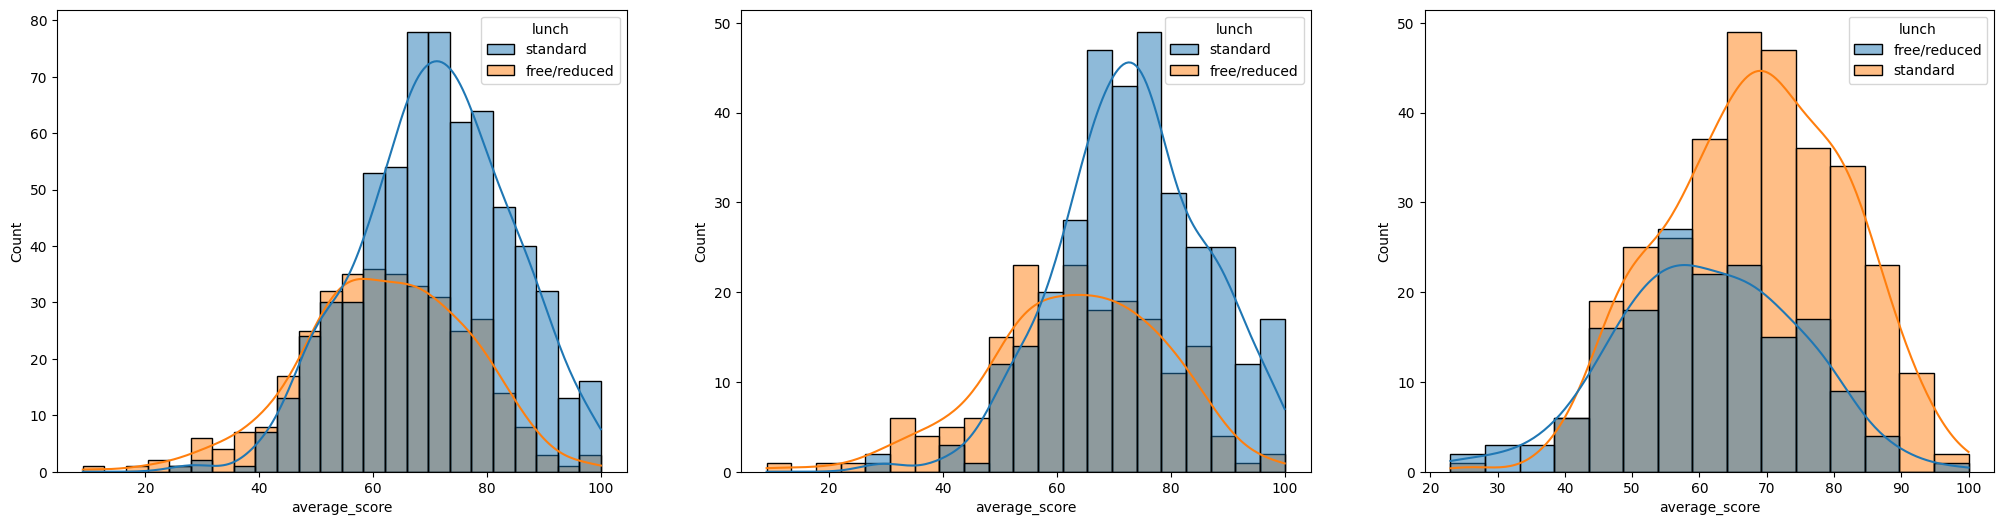

In [44]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

##### As seen above, there are no missing ( null ) values in this dataframe but in real scenarios we need work on dataset with a lot of missing values  

####  Let us explore the Math Score first

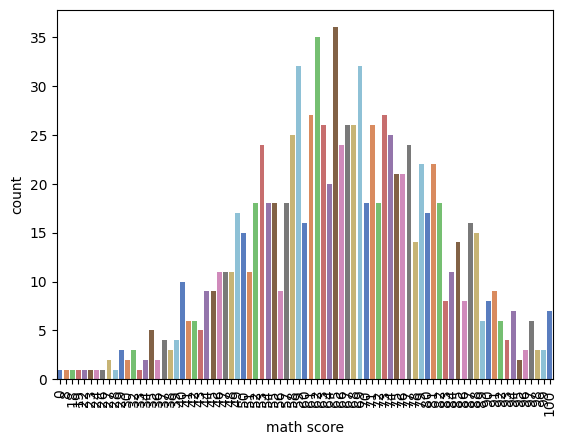

In [18]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### How many students passed in Math exam ?

In [19]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

Math_PassStatus
P    960
F     40
Name: count, dtype: int64

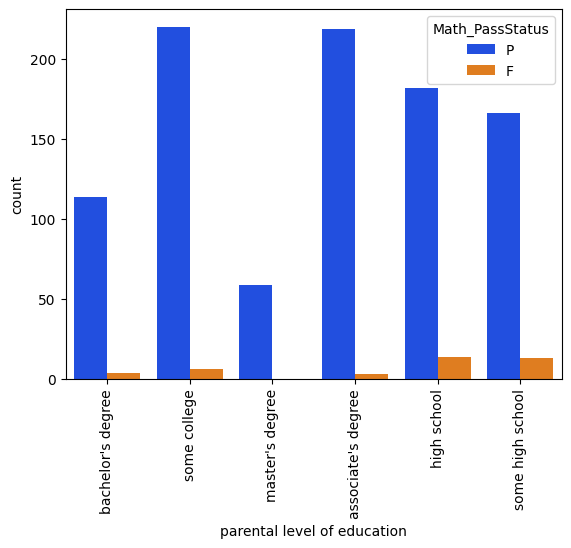

In [20]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let us explore the Reading score

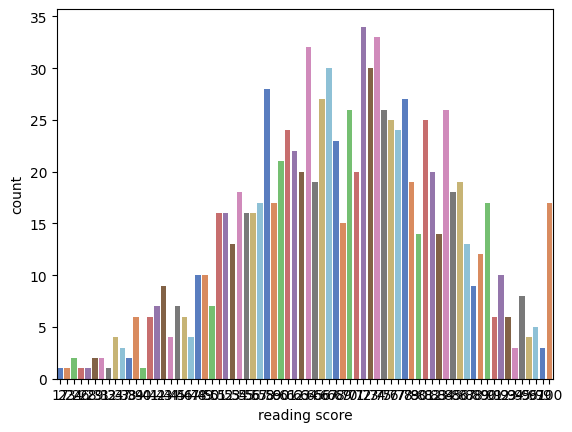

In [21]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

#### How many studends passed in reading ?

In [22]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    974
F     26
Name: count, dtype: int64

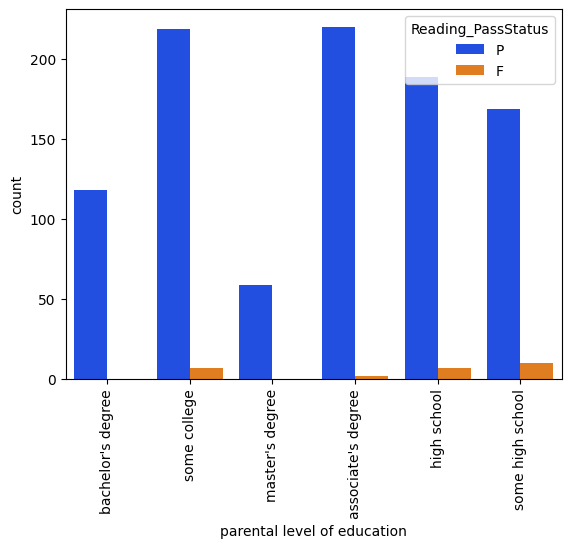

In [23]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let us explore writing score

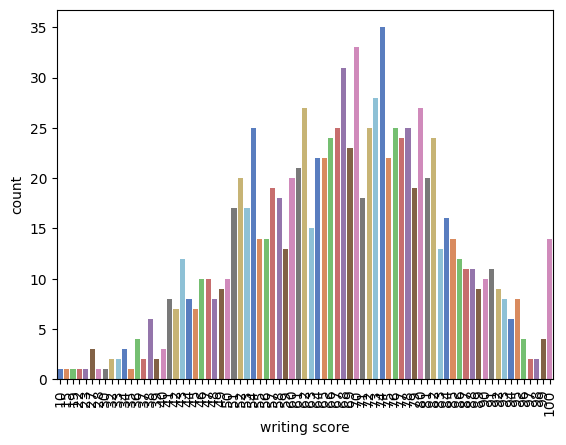

In [24]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### How many students passed writing ?

In [25]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

Writing_PassStatus
P    968
F     32
Name: count, dtype: int64

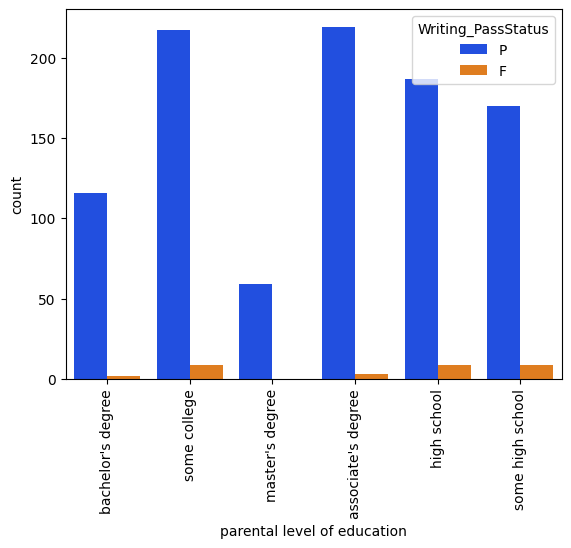

In [26]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Iet us check "How many students passed in all the subjects ?"

In [27]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
P    949
F     51
Name: count, dtype: int64

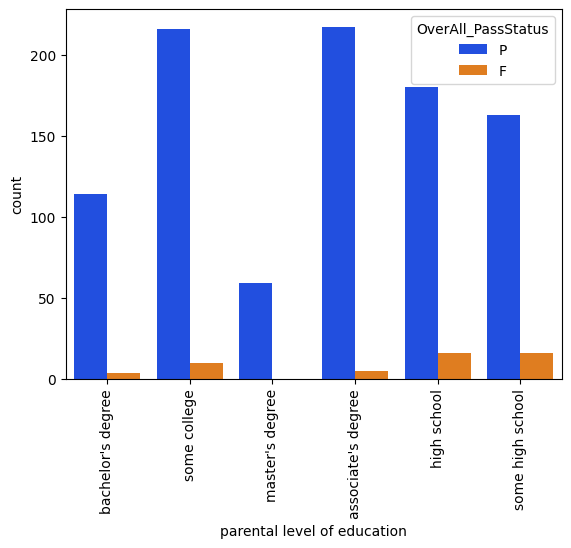

In [28]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Find the percentage of marks

In [29]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

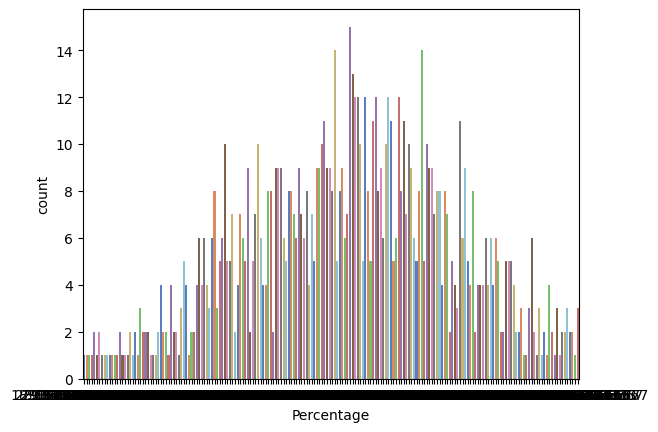

In [30]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

#### Let us assign the grades

### Grading 
####    above 80 = A Grade
####      70 to 80 = B Grade
####      60 to 70 = C Grade
####      50 to 60 = D Grade
####      40 to 50 = E Grade
####    below 40 = F Grade  ( means Fail )


In [31]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade
B    261
C    256
A    198
D    178
E     56
F     51
Name: count, dtype: int64

#### we will plot the grades obtained in a order

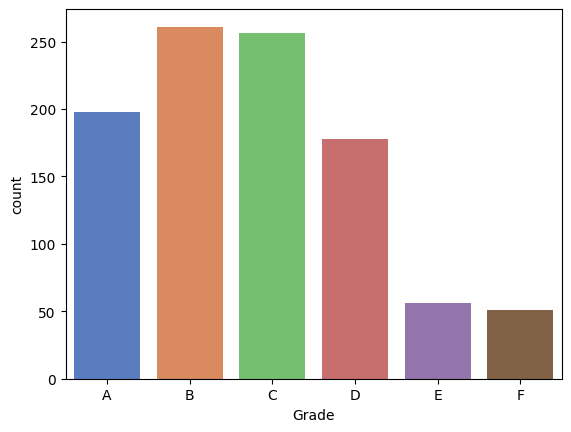

In [32]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

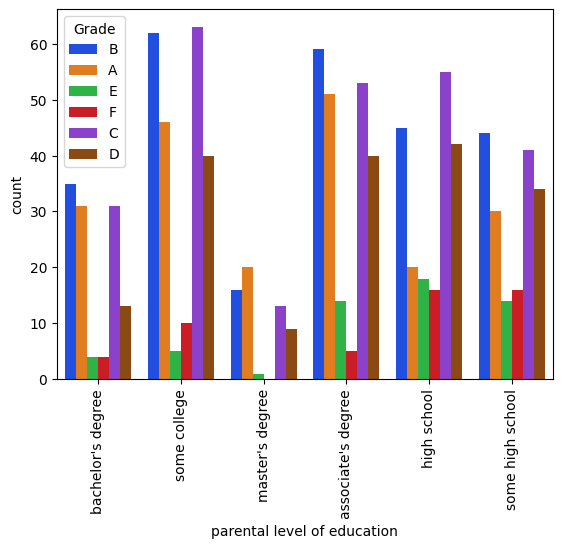

In [33]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 